# Problem 1 - Linear Regression

## Problem statement: 
You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).





## Objective:
Objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

## The data dictionary is given below. 


## Data Dictionary


Carat - Carat weight of the cubic zirconia.

Cut - Describes the cut quality of the cubic zirconia. Quality is in increasing order: Fair, Good, Very Good, Premium, Ideal.

Colour - Colour of the cubic zirconia.

Clarity - Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth - The Height of a cubic zirconia piece, measured from the Culet to the table, divided by its average Girdle Diameter.

Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price - Price of the cubic zirconia.

X - Length of the cubic zirconia in mm.

Y - Width of the cubic zirconia in mm.

Z - Height of the cubic zirconia in mm.

In [866]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [867]:
import os

In [868]:
print(os.__file__)

C:\Users\niranja.dhavan\Anaconda3\lib\os.py


In [869]:
pwd

'C:\\Users\\niranja.dhavan\\Desktop\\Predictive Modelling\\Group Assignment\\LR'

In [870]:
df = pd.read_csv('cubic_zirconia.csv')

In [871]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Dropping unnamed coloumn

In [872]:
df=df.drop('Unnamed: 0',axis=1)

In [873]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


From Above we can see that Depth variable has null values

## Data Understanding

In [875]:
# print the number of records and features/aspects we have in the provided file
df.shape

(26967, 10)

We have more than 26967 records having 10 features

In [876]:
# let's check out the columns/features we have in the dataset
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [877]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

####  lets check unique values in Below variables..


* <font color = 'blue'>__cut__</font>
* <font color = 'blue'>__colour__</font>
* <font color = 'blue'>__clarity__</font>


#### We need to check the unique values in the varaible of object data type.

In [878]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')


cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




### Check for missing values and impute the missing values, if any is present.

In [879]:
df.isnull().sum().sort_values(ascending = False)

depth      697
price        0
z            0
y            0
x            0
table        0
clarity      0
color        0
cut          0
carat        0
dtype: int64

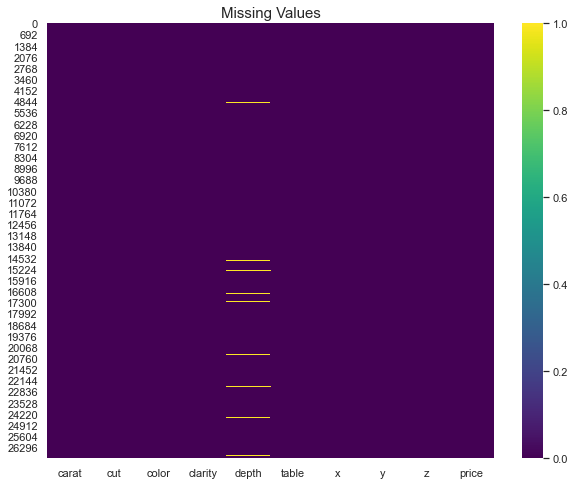

In [880]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values', fontsize=15)
plt.show()

As we can see null values are only present in depth Varaible.

Lets check the percentage of null values in depth varaible.

In [881]:
# Checking the number of rows that will get dropped if we drop the missing values
print('Number of rows to be dropped: {}'.format(df.shape[0]-df.dropna().shape[0]))
print('Percentage of rows to be dropped: {:.2f}%'.format((df.shape[0]-df.dropna().shape[0])*100/df.shape[0]))

Number of rows to be dropped: 697
Percentage of rows to be dropped: 2.58%


Dropping the Null Values from above dataset. As there as nominal null values.

In [882]:
#for column in df.columns:
    #if df[column].dtype != 'object':
        #median = df[column].median()
        #df[column] = df[column].fillna(median)    
        
#df.isnull().sum()


In [883]:
df.dropna(inplace=True)

In [884]:
df.shape

(26270, 10)

### Check dupicated Values in the dataset.

In [885]:
duplicate = df[df.duplicated()] 
duplicate

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


We can see that there are dulpicated values in the dataset

In [886]:
duplicate.shape

(34, 10)

lets go ahead and drop the dulpicated entries in the dataset.

In [887]:
df.drop_duplicates(inplace=True)

In [888]:
df.shape

(26236, 10)

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26236 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26236 non-null  float64
 1   cut      26236 non-null  object 
 2   color    26236 non-null  object 
 3   clarity  26236 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26236 non-null  float64
 6   x        26236 non-null  float64
 7   y        26236 non-null  float64
 8   z        26236 non-null  float64
 9   price    26236 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [890]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


We can see that min as 0 in x, y & z. Where x, y, & z means the Lengh , width & height. Where it cannot be zero. Lets Investigate.

In [891]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [892]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

8

We can see there are 8 rows with Dimensions 'Zero'

We will Drop them as it seems better choice instead of filling them with any of Mean or Median

In [893]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [894]:
df.shape

(26228, 10)

In [895]:
(26967 - 26228 )

739

In [896]:
print('Percentage of rows dropped from orignal datset: {:.2f}%'.format((26967 - 26228 )*100/26967))

Percentage of rows dropped from orignal datset: 2.74%


Post cleaning the data set we have lost 2.74% of data from orignal data set. 

## Exploratory Data Analysis

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

Target Variable Distribution
Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution.

### Target Variable Distribution

Text(0.5, 0.98, 'Price Variable Anaylsis')

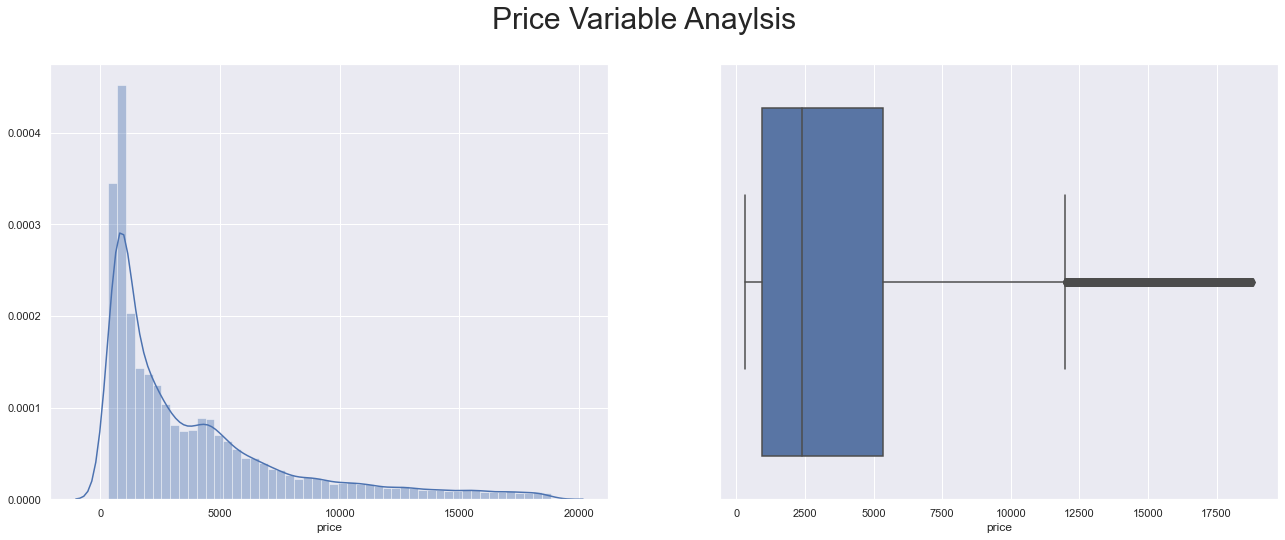

In [897]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['price'], ax=ax[0])
sns.boxplot(df['price'],  orient='h', ax=ax[1])
fig.suptitle("Price Variable Anaylsis", size=30)

Text(0.5, 1.0, 'Price Variable Anaylsis')

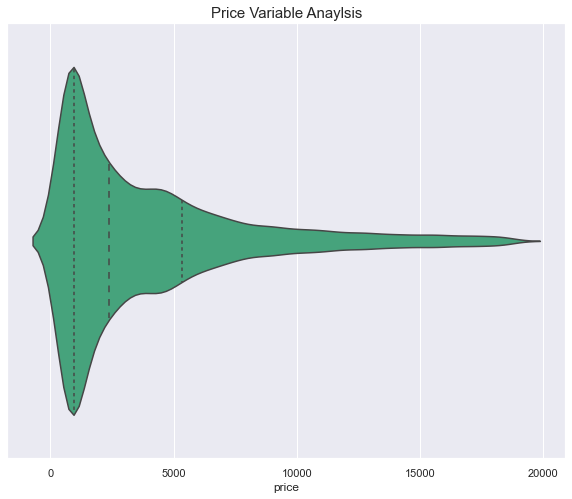

In [898]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=df['price'], inner="quartile", color="#36B37E");
plt.title("Price Variable Anaylsis", size=15)

## Let's do some visual data analysis of the Dependent features

#### Analyzing Feature: Price (Target Variable)

In [899]:
print("Skewness is :",df.price.skew())

Skewness is : 1.6205580396732198


Text(0.5, 0.98, 'Price Variable Anaylsis')

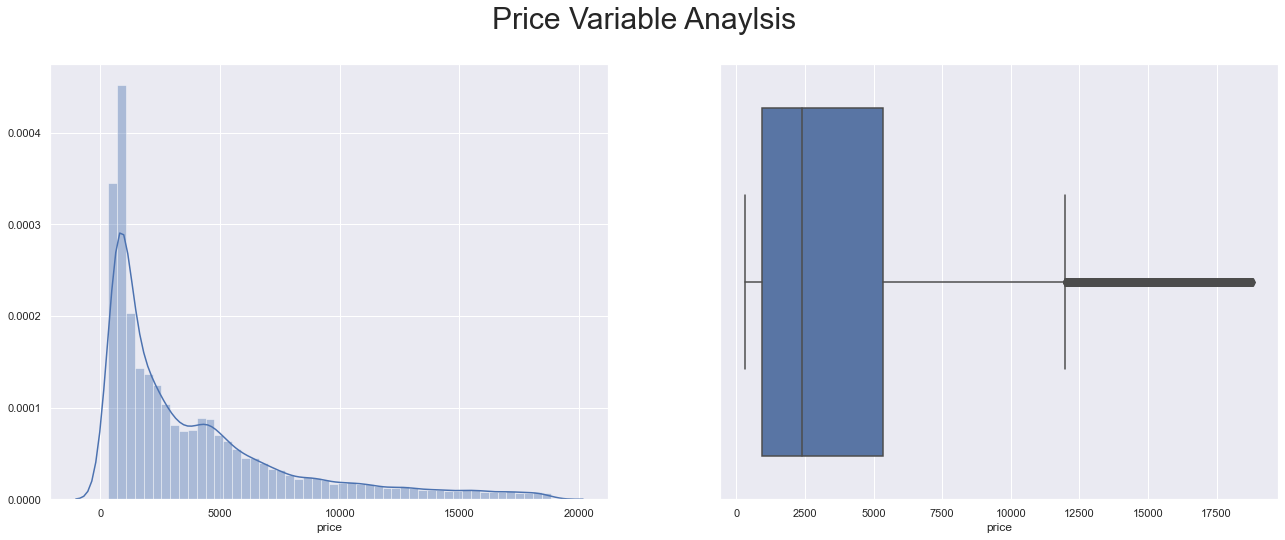

In [900]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['price'], ax=ax[0])
sns.boxplot(df['price'],  orient='h', ax=ax[1])
fig.suptitle("Price Variable Anaylsis", size=30)


* The Price Variable distribution seems to be Highly Left-skewed. 


* Basis skewness value we can see that distribution is highly skewed


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

In [901]:
df.price.describe()

count    26228.000000
mean      3934.616288
std       4018.196388
min        326.000000
25%        945.000000
50%       2373.000000
75%       5355.250000
max      18818.000000
Name: price, dtype: float64

#### Analyzing Feature: Cut

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

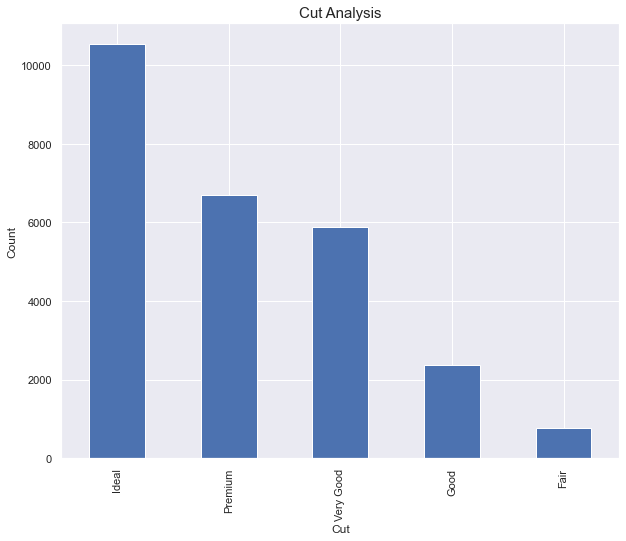

In [902]:
plt.figure(figsize=(10,8))
df['cut'].value_counts().plot(kind='bar')
plt.title('Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title("Cut Analysis", size=15)
sns.despine

* Basis above figure we can see that ideal cut diamond have comparably huge demand in the market followed by the premium cut.


* Basis above figure we can also infer that quality of cut changes the demand for the product goes down.

#### Analyzing Feature: color

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

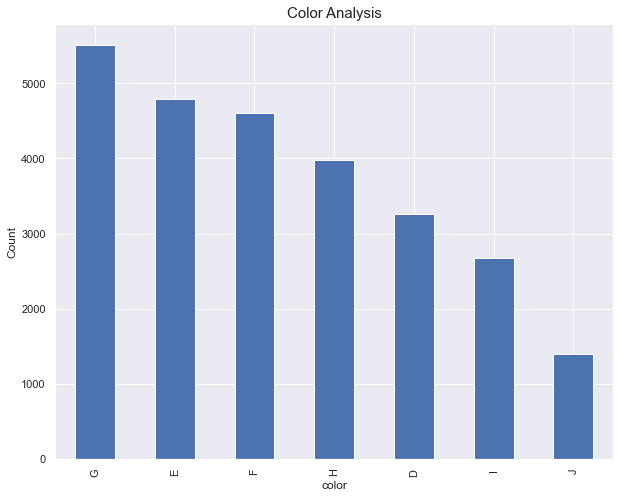

In [903]:
plt.figure(figsize=(10,8))
df['color'].value_counts().plot(kind='bar')
plt.title('color')
plt.xlabel('color')
plt.ylabel('Count')
plt.title("Color Analysis", size=15)
sns.despine

![](diamond-color-chart.png)

<img src="diamond-color-chart1.jpg" style="width:300;height:200px"/>

Source - https://www.gemsociety.org/diamond-advice/the-4cs-color/

* Basis above figure we can see that G Colour diamond have comparably huge demand in the market as it might be lowely priced as compare to Colorless cibic zirconia.


* Basis above figure we can also infer that colourless cubic zirconia are high priced in market as compared to near colourless cubic zirconia.

#### Analyzing Feature: clarity

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

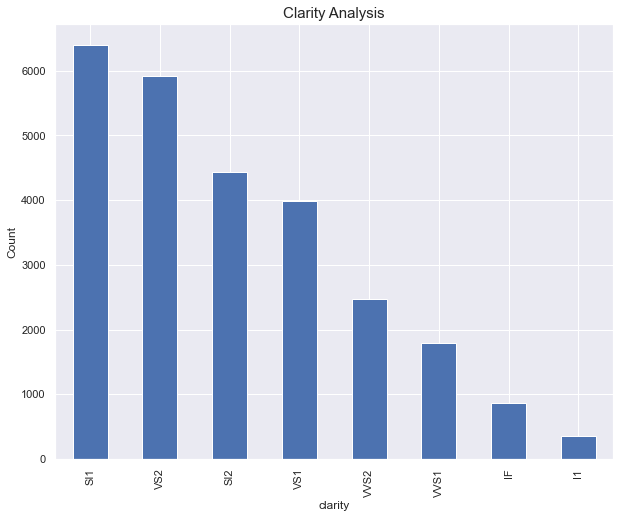

In [904]:
plt.figure(figsize=(10,8))
df['clarity'].value_counts().plot(kind='bar')
plt.title('clarity')
plt.xlabel('clarity')
plt.ylabel('Count')
plt.title("Clarity Analysis", size=15)
sns.despine

Source - https://www.gemsociety.org/diamond-advice/the-4cs-clarity/

![](diamond-inclusion-chart.png)

* Basis above figure we can see that SI1 Clarity cubic zirconia have comparably huge demand in the market followed by the VS2 as they might be prices lower as compare to flawless cubix zirconia..


* Basis above figure we can also infer that IF cubic zirconia Has lower demand in the market due to higher price bracket.

#### Analyzing Feature: depth

In [905]:
print("Skewness is :",df.depth.skew())

Skewness is : -0.02504225720857709


Text(0.5, 0.98, 'Depth Variable Anaylsis')

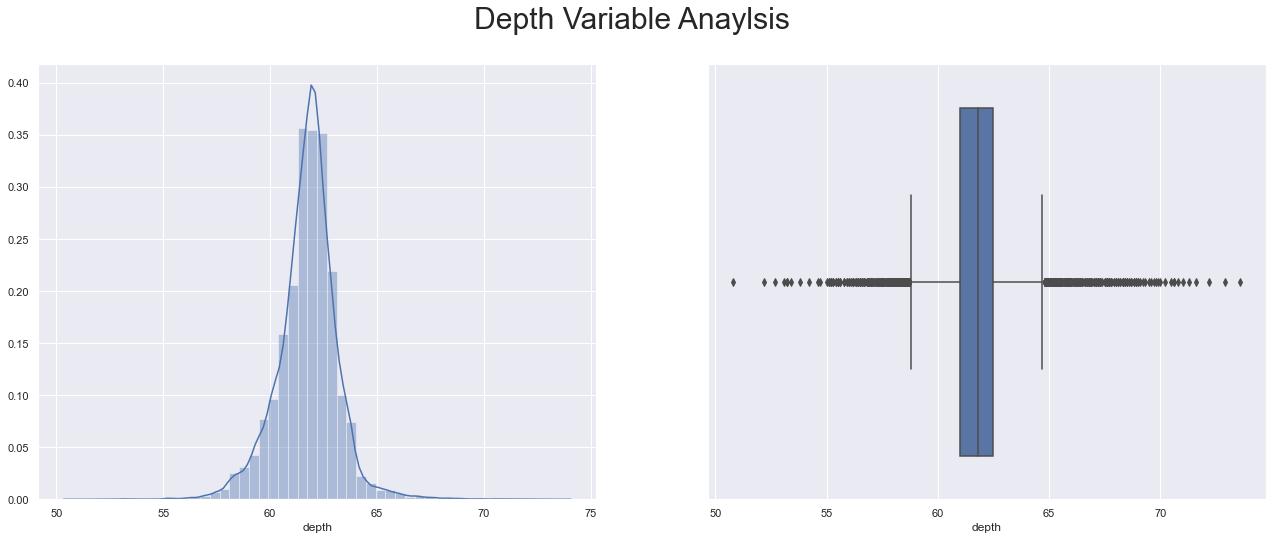

In [906]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['depth'], ax=ax[0])
sns.boxplot(df['depth'],  orient='h', ax=ax[1])
fig.suptitle("Depth Variable Anaylsis", size=30)


In [907]:
df.depth.describe()

count    26228.000000
mean        61.745573
std          1.411824
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

* Basis above figure we can see that Data distribution for 'depth' varaible is slightly left-skewed.


* Basis skewness value we can see that distribution is approximately symmetric.


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: x

In [908]:
print("Skewness is :",df.x.skew())

Skewness is : 0.4017606900531265


Text(0.5, 0.98, 'x Variable Anaylsis')

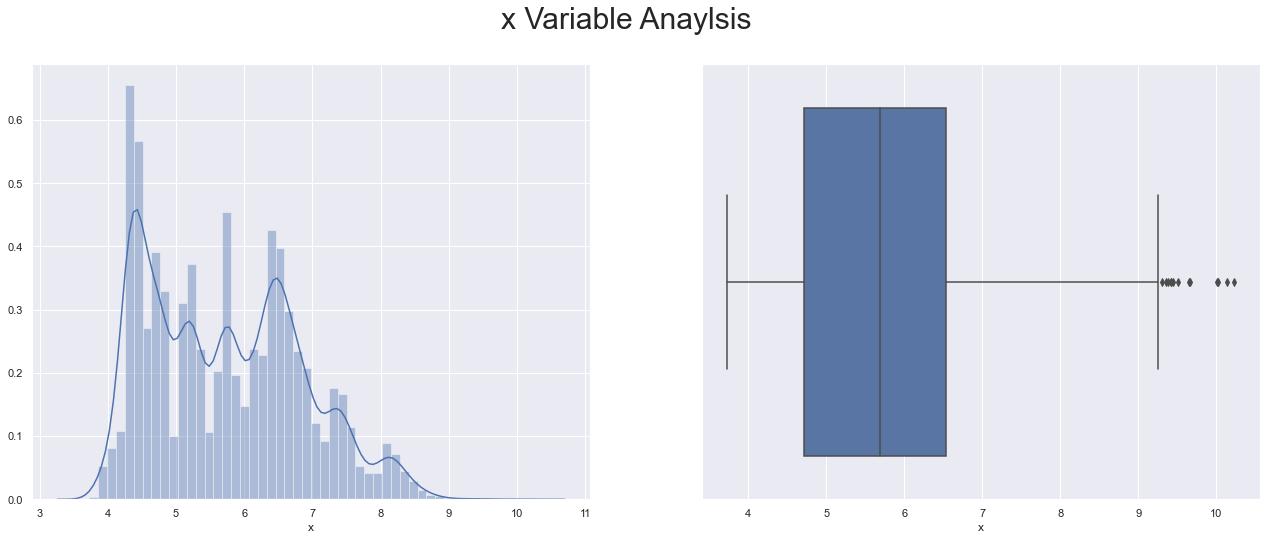

In [909]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['x'], ax=ax[0])
sns.boxplot(df['x'],  orient='h', ax=ax[1])
fig.suptitle("x Variable Anaylsis", size=30)


In [910]:
df.x.describe()

count    26228.000000
mean         5.728685
std          1.125010
min          3.730000
25%          4.710000
50%          5.690000
75%          6.540000
max         10.230000
Name: x, dtype: float64

* Basis above figure we can see that Data distribution for 'x' varaible is Rigt-skewed.


* Basis skewness value we can see that distribution is approximately symmetric.


* Basis box plot we can see that there are outliers in the varaible. Lets treat the outliers in the further process.

#### Analyzing Feature: y

In [911]:
print("Skewness is :", df.y.skew())

Skewness is : 3.979609048656695


The ceil_measure varaible seems to be Right skewed.

Text(0.5, 0.98, 'y Variable Anaylsis')

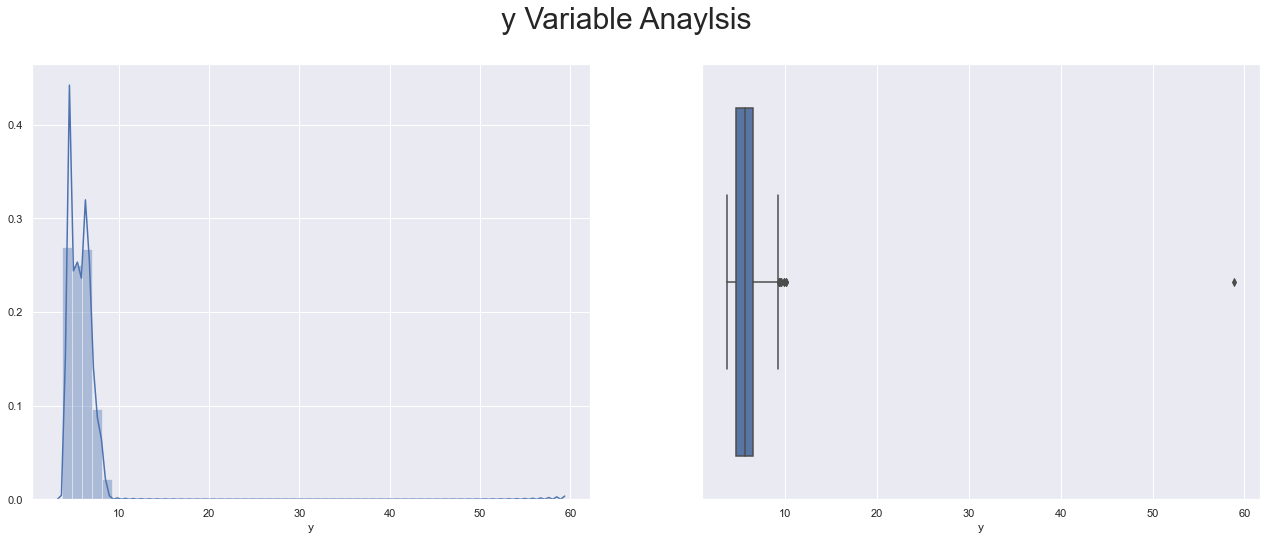

In [912]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['y'], ax=ax[0])
sns.boxplot(df['y'],  orient='h', ax=ax[1])
fig.suptitle("y Variable Anaylsis", size=30)


In [913]:
df.y.describe()

count    26228.000000
mean         5.732539
std          1.164034
min          3.710000
25%          4.720000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64

* Basis above figure we can see that Data distribution for 'y' varaible is highly left-skewed.


* Basis skewness value we can see that distribution is highly skewed.


* Basis box plot we can see that there are couple of outliers in the varaible. Lets treat the outliers in the further process.


#### Analyzing Feature: z

In [914]:
print("Skewness is :", df.z.skew())

Skewness is : 0.4083754723306729


Text(0.5, 0.98, 'z Variable Anaylsis')

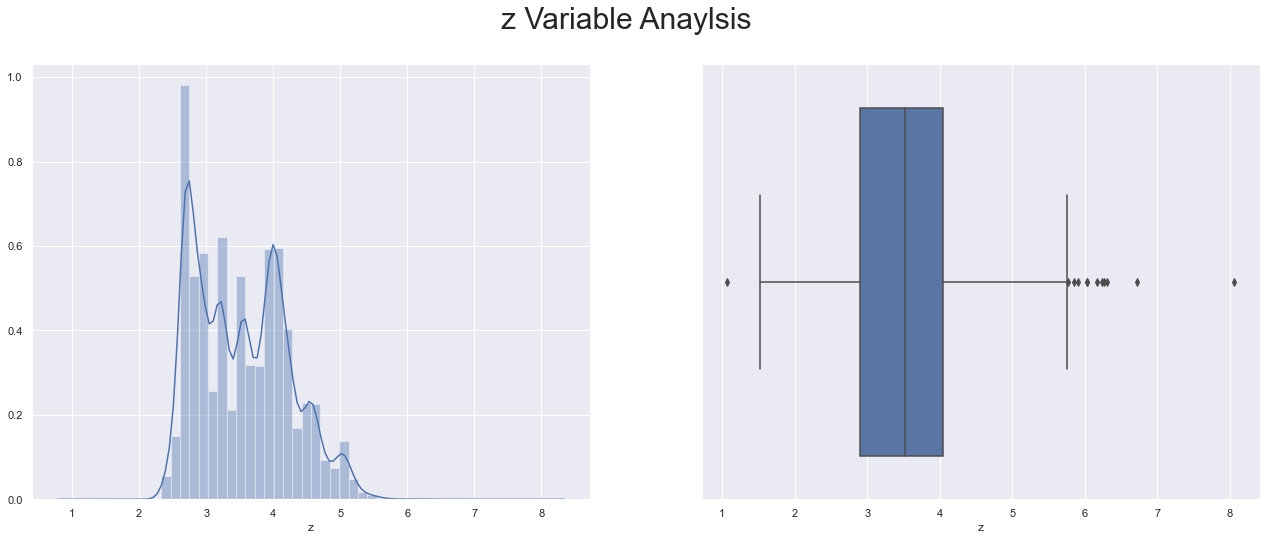

In [915]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(df['z'], ax=ax[0])
sns.boxplot(df['z'],  orient='h', ax=ax[1])
fig.suptitle("z Variable Anaylsis", size=30)

In [916]:
df.z.describe()

count    26228.000000
mean         3.537417
std          0.695979
min          1.070000
25%          2.900000
50%          3.520000
75%          4.040000
max          8.060000
Name: z, dtype: float64

Data distribution tells us, 'z' is Rigt-skewed.The 'z' Variable distribution seems to be symmetric slighlty Right skewed.

* Basis above figure we can see that Data distribution for 'z' varaible is Right-skewed.


* Basis skewness value we can see that distribution is approximately symmetric.


* Basis box plot we can see that there are couple of outliers in the varaible. Lets treat the outliers in the further process.

### Bi-Variate Analysis on Price Variable

#### PairPlot

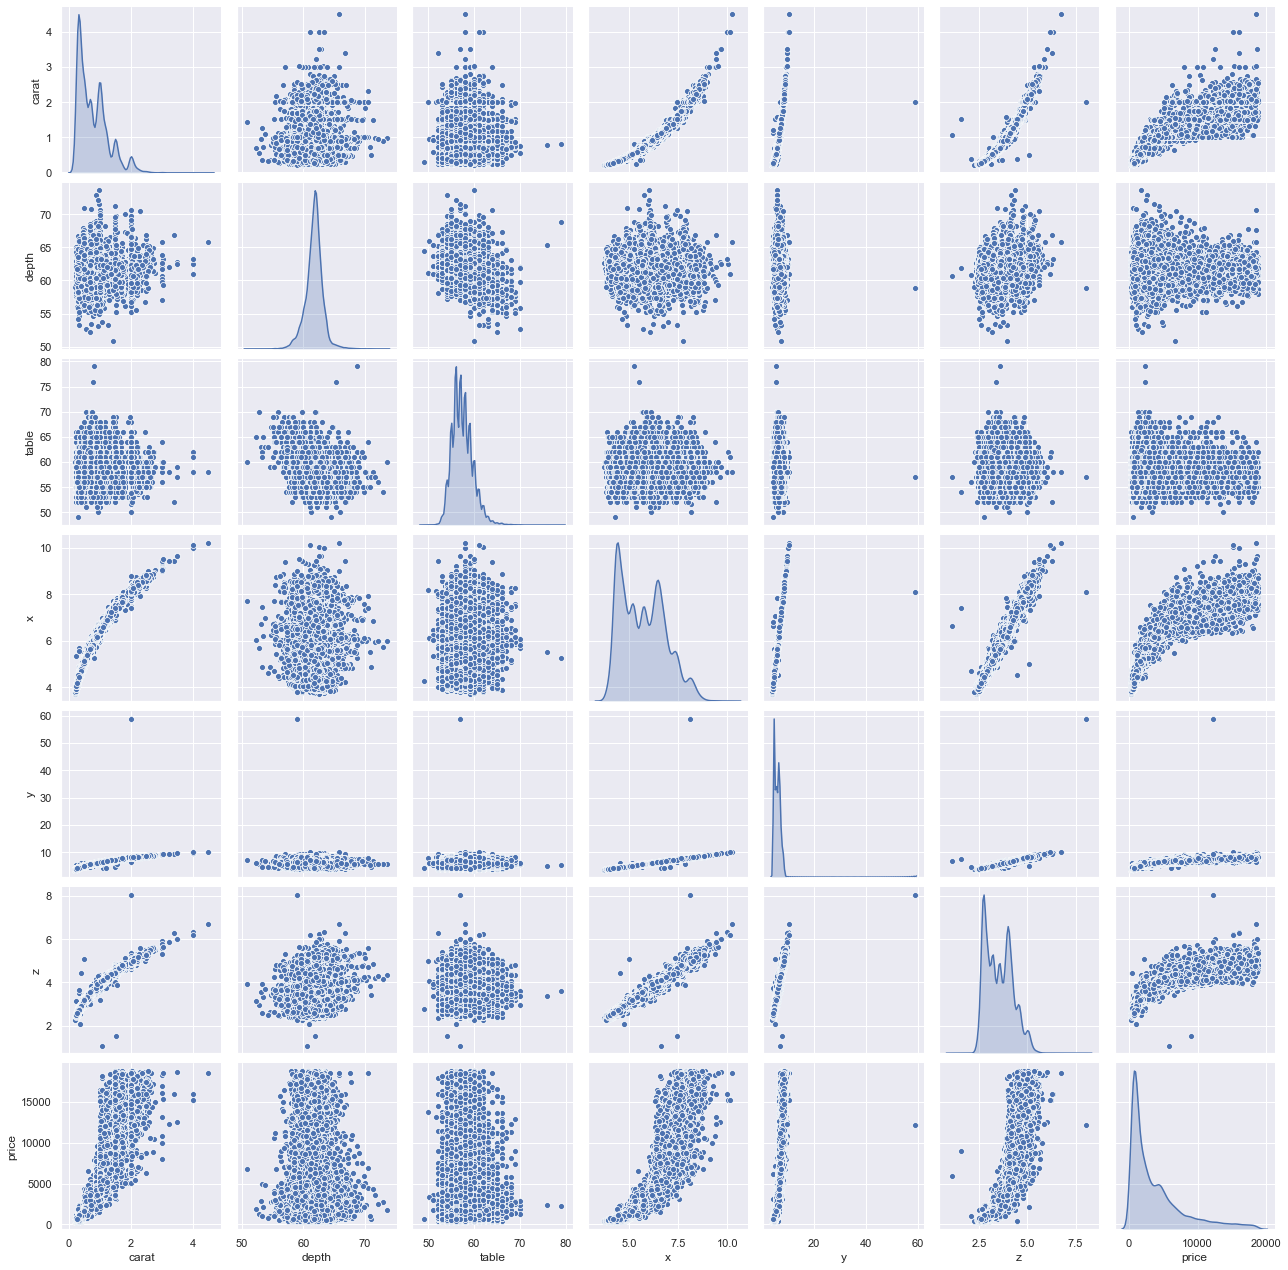

In [917]:
# Pairplot using sns

sns.pairplot(df, diag_kind = 'kde')

In [918]:
# let's see correlation between the different features
df_corr = df.corr(method ='pearson')
df_corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.035575,0.181592,0.977881,0.941439,0.976150,0.922116
depth,0.035575,1.000000,-0.297411,-0.018465,-0.024532,0.101382,-0.002736
table,0.181592,-0.297411,1.000000,0.197504,0.183406,0.157704,0.126612
x,0.977881,-0.018465,0.197504,1.000000,0.961537,0.990733,0.887243
y,0.941439,-0.024532,0.183406,0.961537,1.000000,0.961027,0.856199
z,0.976150,0.101382,0.157704,0.990733,0.961027,1.000000,0.882059
price,0.922116,-0.002736,0.126612,0.887243,0.856199,0.882059,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

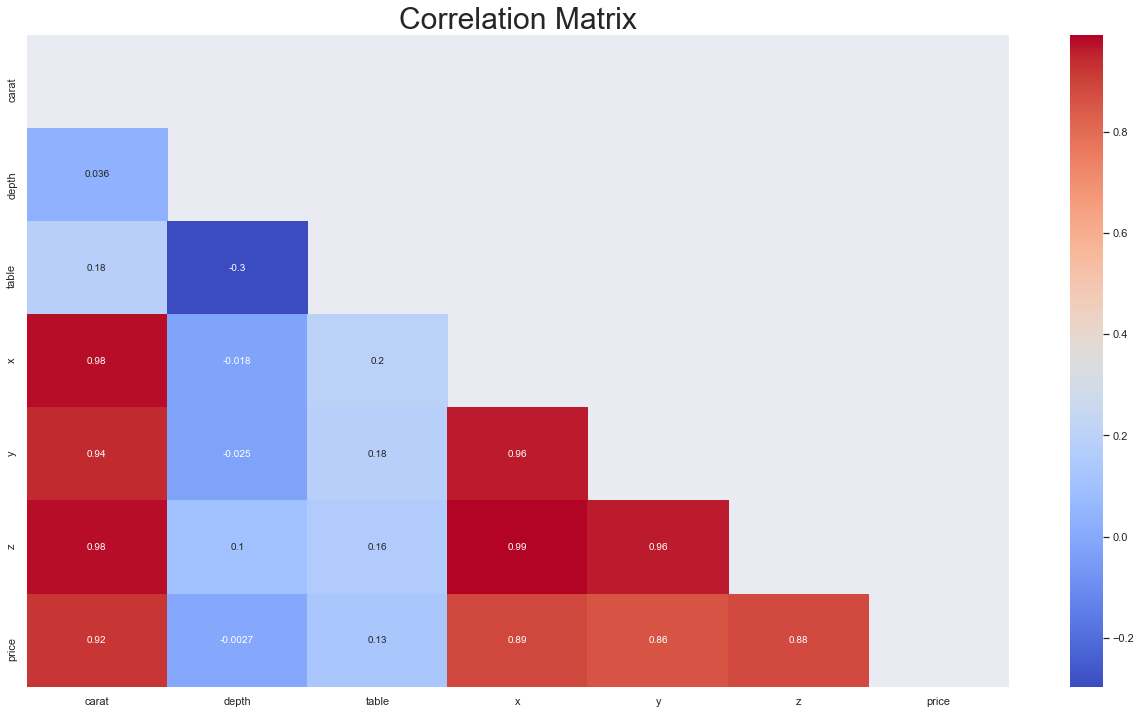

In [919]:
# Plotting heatmap
plt.subplots(figsize =(22, 12)) 
sns.heatmap(df_corr,cmap="coolwarm",annot=True, mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.title("Correlation Matrix", size=30)

* we can see that X , Y, Z Have a very high co-orealtion with target variable.


* Also we can see that there is multi-co-realinity between couple of varaible.


* We can also see that there is negative relation between price & depth.

We have linear relationships in featues as we got to know from above Heat map.

Text(0.5, 1.0, 'Correlation with Price Variable')

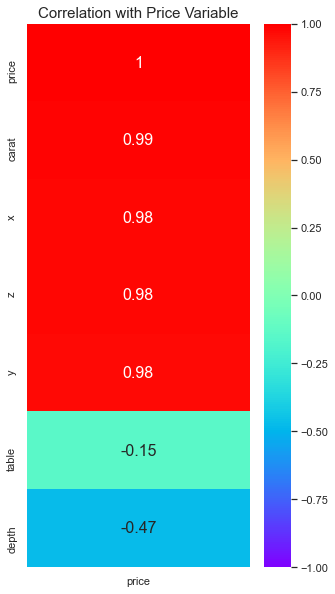

In [920]:
top_features = df_corr.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)
plt.title("Correlation with Price Variable", size=15)

* Basis above figure we can see that there is very high co-realtion between x, y, z & carat varaible with target varaible price. 

In [921]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


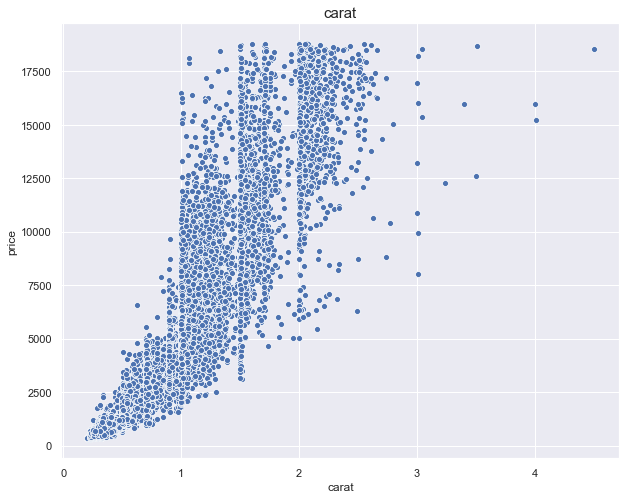

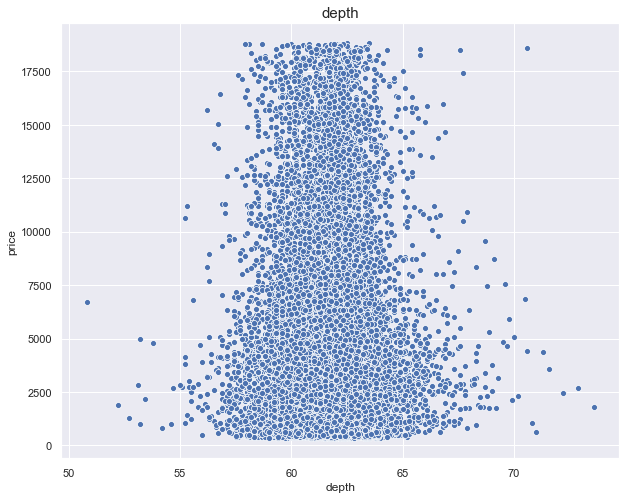

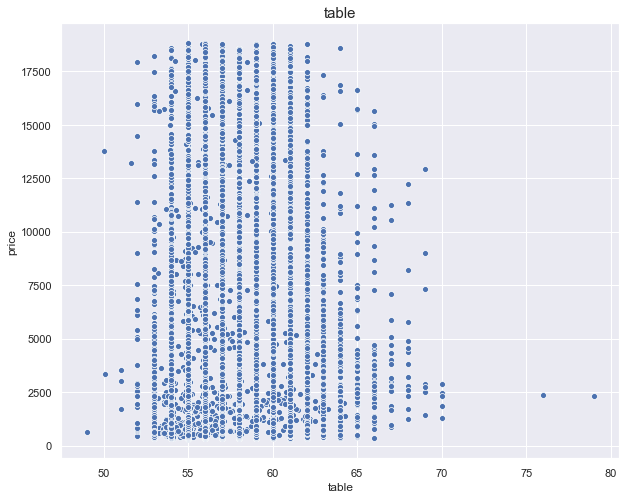

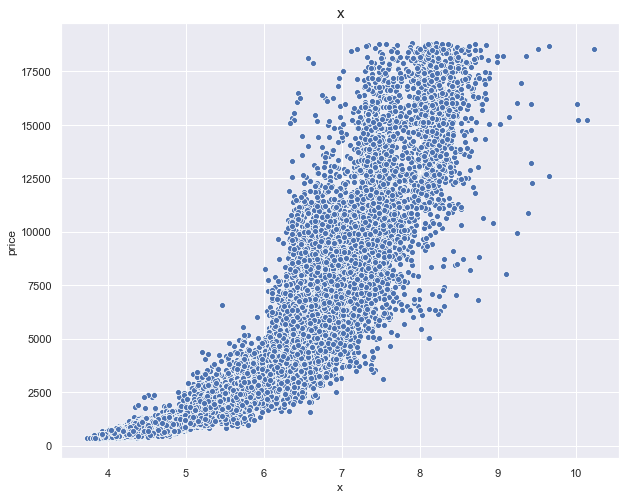

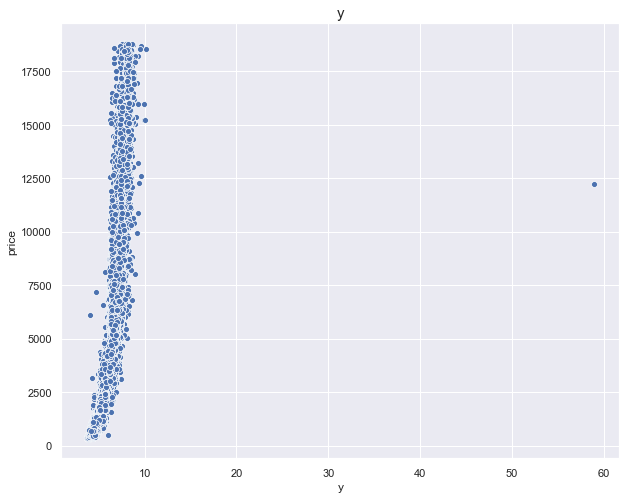

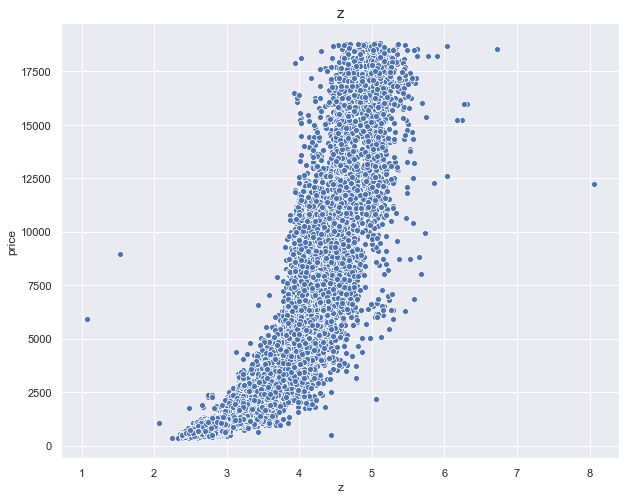

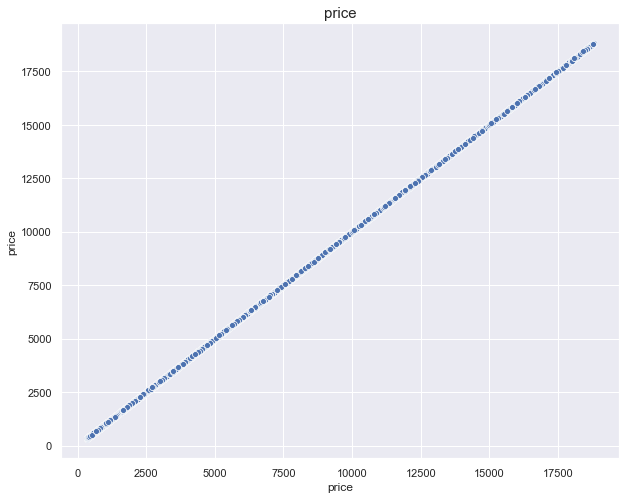

In [922]:
list1 = ['cut','color','clarity']
df_def = df.drop(columns=list1)
def scattered_plot():
    for i in df_def.columns:
        plt.figure(figsize=(10,8))
        sns.scatterplot(x=i,y='price', data=df, edgecolors="#000000", linewidths=0.5)
        plt.title(i, size=15)
        plt.show()
scattered_plot() 

* Basis above figure we can see that as the carat cubic zirconia  increases the prices increases.


* Basis above figure we can see that as the cubic zirconia Length of the cubic zirconia in mm increases the prices increses.


* Basis above figure we can see that as the cubic zirconia Height of the cubic zirconia in mm. increases the prices increses.


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Cut vs Price')

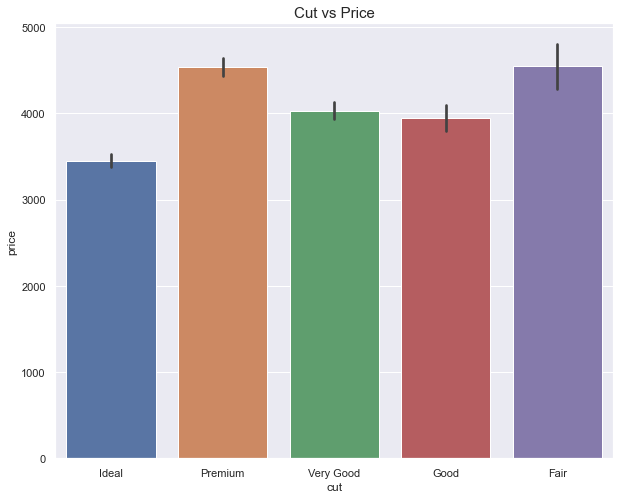

In [923]:
plt.figure(figsize=(10, 8))
print(sns.barplot(df['cut'],df['price']))
plt.title("Cut vs Price", size=15)

* Basis above figure we can see that fair cut is being highly priced in the market.


* Basis above figure we can see that premium cut has second highly price cubic zirconia in the market. 

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Color vs Price')

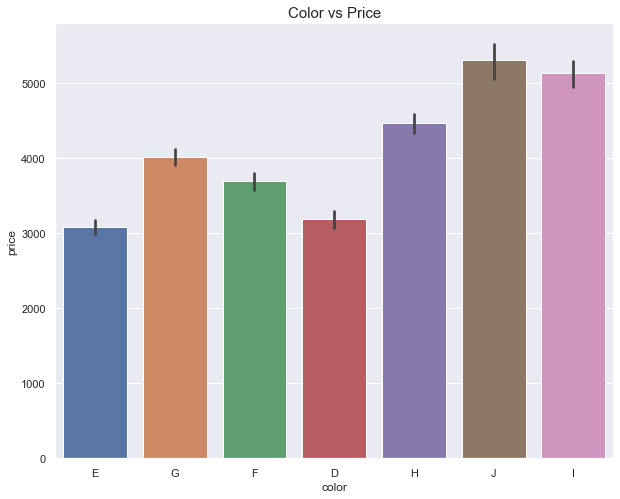

In [924]:
plt.figure(figsize=(10, 8))
print(sns.barplot(df['color'],df['price']))
plt.title("Color vs Price", size=15)

<img src="diamond-color-chart1.jpg" style="width:300;height:200px"/>

* Basis above figure we can see that J Colour is being highly priced in the market. 


* Basis above figure we can see that Near colourless cubic zirconia has high prices in the market.

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Clarity vs Price')

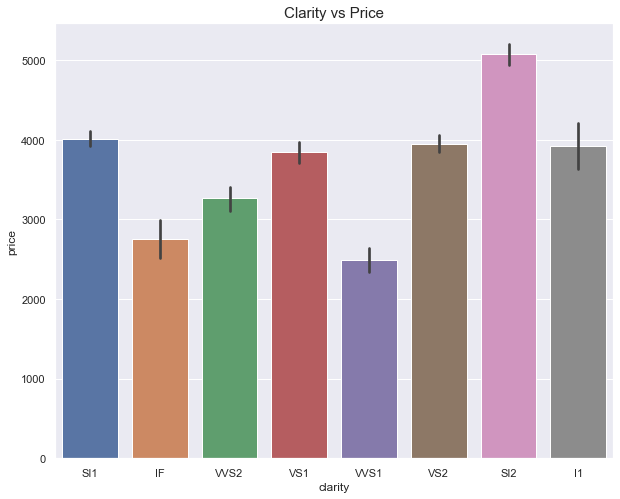

In [925]:
plt.figure(figsize=(10, 8))
print(sns.barplot(df['clarity'],df['price']))
plt.title("Clarity vs Price", size=15)

![](diamond-inclusion-chart.png)

* Basis above figure we can see that SI1 Colour is being highly priced in the market. Followed by SI1 



* Basis above figure we can see that Small inclusions cubic zirconia, very small inclusions have higher prices as compared to the Flawless cubic zirconia. 

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Carat vs Price')

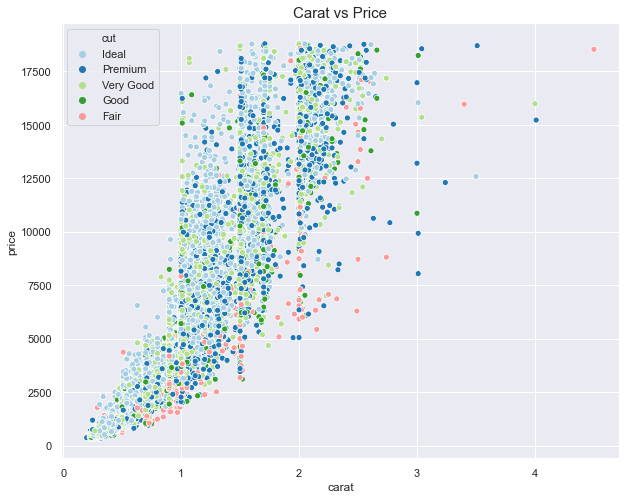

In [926]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(df['carat'],df['price'],hue=df['cut'],palette='Paired',legend='full'))
plt.title("Carat vs Price", size=15)

* Basis above figure we can see that ideal cut cubic zirconia are Highly priced in the market irrespective of the carat.


* Basis above figure we can see that Fair cut cubic zirconia are lowely priced in the market as compared to the other cuts.



* Basis above figure we can see that premium & very good cut cubic zirconia are averagely priced in the market.


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Carat vs Price')

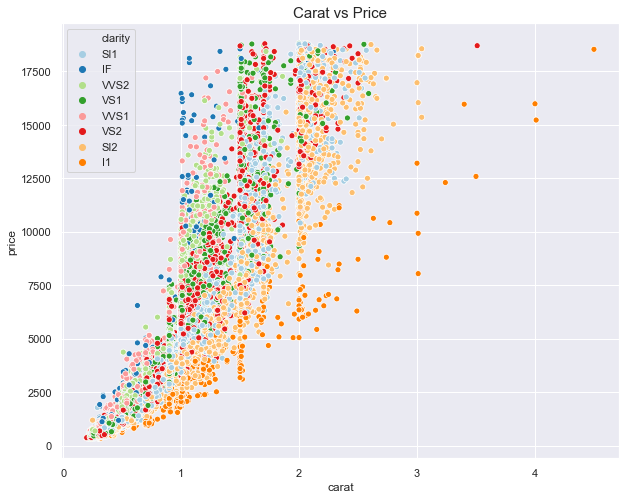

In [927]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(df['carat'],df['price'],hue=df['clarity'],palette='Paired',legend='full'))
plt.title("Carat vs Price", size=15)

* Basis above figure we can see that I1 clarity cubic zirconia are lower priced in the market irrespective of the carat.


* Basis above figure we can see that SI2 clarity cubic zirconia are priced Above I1 clarity cubic zirconia in the market irrespective of the carat.


* Basis above figure we can see that IF cut cubic zirconia are Highely priced in the market as compared to the other cuts despite of being the lower carats(i.e. Below 2carat).

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Carat vs Price')

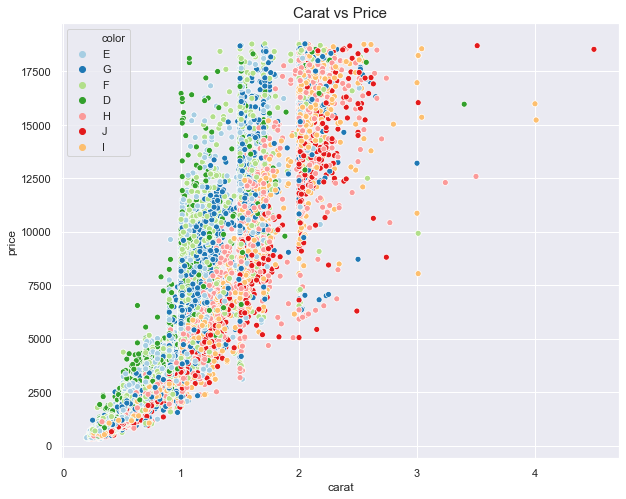

In [928]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(df['carat'],df['price'],hue=df['color'],palette='Paired',legend='full'))
plt.title("Carat vs Price", size=15)

* Basis above figure we can see that H  & I Colour cubic zirconia are lower priced in the market irrespective of the carat.


* Basis above figure we can see that D, E & F Colour cubic zirconia are Highely priced in the market.

### Pre Processing of Data

* Basis analysis of above we can see that there are outliers in the variables. Lets go ahead and treat the outliers.

In [929]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


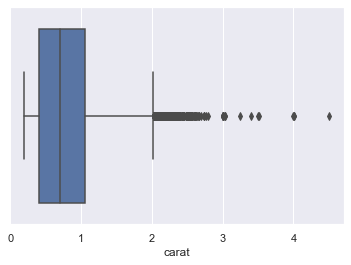

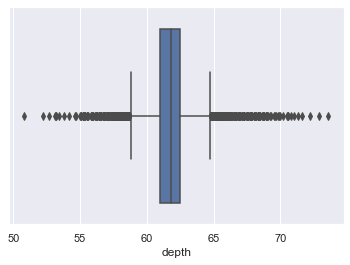

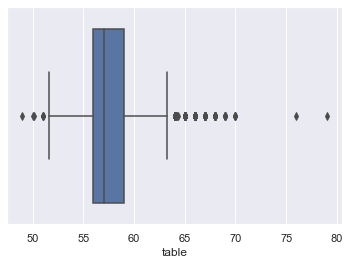

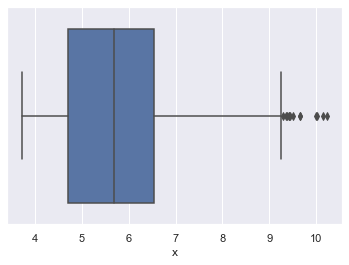

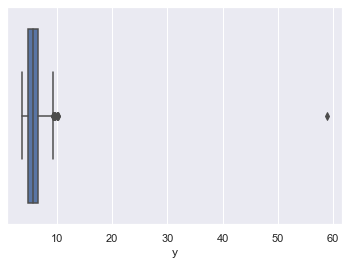

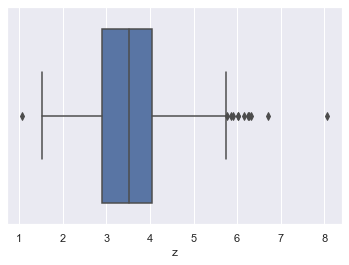

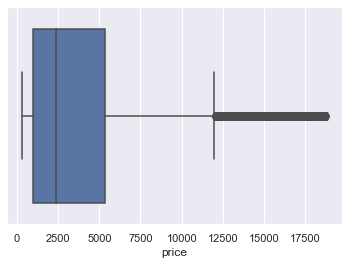

In [930]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [931]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [932]:
# treating the outliers

def outlier_treatment(columns):
   
    for column in df[cont].columns:      
       
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 -Q1
        lower = Q1 - (1.5*IQR)
        higher = Q3 + (1.5*IQR)
   
        df[column] = np.where(df[column]>higher, higher , df[column])
        df[column] = np.where(df[column]<lower, lower , df[column])

df_columns =df.columns
outlier_treatment(df_columns)

for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])


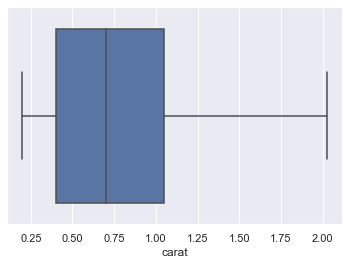

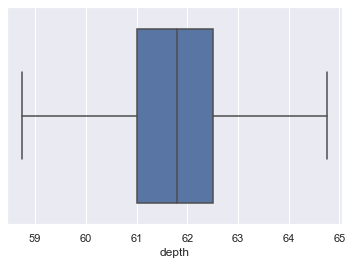

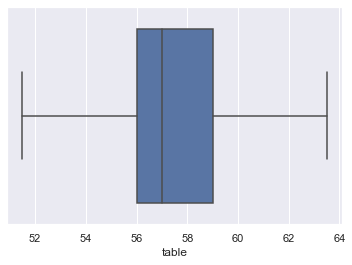

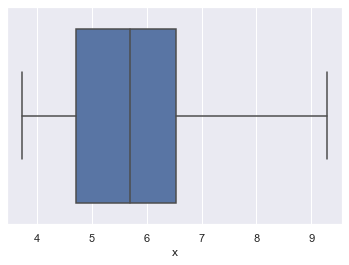

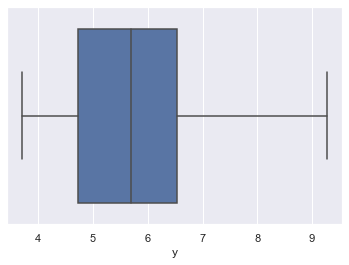

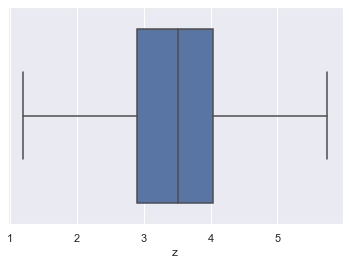

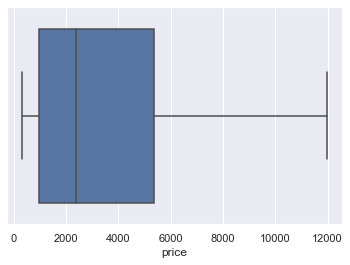

In [933]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()


In [934]:
#Replace the categorical variables with the numbers as its a ordinal range.
df['cut'] = df['cut'].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})

In [935]:
#Replace the categorical variables with the numbers as its a ordinal range.
df['clarity'] = df['clarity'].map({'I3': 0, 'I2': 1, 'I1': 2, 'SI2': 3, 'SI1': 4, 'VS2': 5, 'VS1': 6, 'VVS2': 7, 'VVS1': 8, 'IF': 9, 'FL': 10})

## Linear Regression

In [936]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,3,9,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,2,7,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,4,6,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,4,8,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [937]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [938]:
X = df_dummy.drop('price', axis=1)
y = df_dummy[['price']]


In [939]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [940]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [941]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [942]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8898.792546002822
The coefficient for cut is 108.8515676985984
The coefficient for clarity is 427.3884115099839
The coefficient for depth is 53.48664980488964
The coefficient for table is -11.601400239582786
The coefficient for x is -1088.6226559769634
The coefficient for y is 1486.6515884191042
The coefficient for z is -1276.0144922553736
The coefficient for color_E is -191.27953722452753
The coefficient for color_F is -268.42618049275814
The coefficient for color_G is -435.7398936109782
The coefficient for color_H is -890.7804757279353
The coefficient for color_I is -1329.5517155324553
The coefficient for color_J is -1882.9879378308774


In [943]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5660.075472525679


In [944]:
regression_model.score(X_train, y_train)

0.9337277147119576

In [945]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9320625448182404

## Model Considering All Variables.

In [946]:
import statsmodels.formula.api as SM

In [947]:
df_dummy.head()

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,3,9,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,2,7,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,4,6,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,4,8,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [948]:
f_1 = 'price~carat+cut+clarity+depth+table+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [949]:
model_1 = SM.ols(f_1,data=df_dummy).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.618e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:22   Log-Likelihood:            -2.1549e+05
No. Observations:               26228   AIC:                         4.310e+05
Df Residuals:                   26213   BIC:                         4.311e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6347.3872    733.729     -8.651      0.000   -7785.537   -4909.238
carat       8968.8233     68.975    130.031      0.000    8833.629    9104.017
cut          107.6421      6.115     17.602      0.000      95.656     119.628
clarity      423.8668      3.772    112.379      0.000     416.474     431.260
depth         66.3467     10.394      6.383      0.000      45.973      86.720
table        -10.9503      3.277     -3.342      0.001     -17.373      -4.528
x          -1164.1699    101.950    -11.419      0.000   -1363.997    -964.342
y           1663.5257    100.834     16.498      0.000    1465.885    1861.166
z          -1487.4303    138.225    -10.761      0.000   -1758.359   -1216.502
color_E     -211.9780     20.354    -10.415      0.000    -251.873    -172.083
color_F     -284.8784     20.618    -13.817      0.000    -325.290    -244.467
color_G     -457.9352     20.113    -22.768      0.000    -497.358    -418.512
color_H     -888.0530     21.490    -41.324      0.000    -930.174    -845.932
color_I    -1332.4456     23.992    -55.537      0.000   -1379.471   -1285.420
color_J    -1879.0297     29.388    -63.939      0.000   -1936.632   -1821.428
==============================================================================
Omnibus:                     3904.258   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18556.862
Skew:                           0.649   Prob(JB):                         0.00
Kurtosis:                       6.911   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, let us check and treat the multicollinearity problem if it is present.¶

In [950]:
model_name = []
model_perf = []

model_name.append('All Variables')
model_perf.append(model_1.rsquared_adj)

- ### Variance Inflation Factor (VIF) regresses the dependent variables amongst themselves and then calculates the VIF values based on the ${R^2}$ of each such regression.

- ### The formula for VIF calculation is :
- # \begin{equation*} VIF  =  \frac{1}{1 - {R^2}} \end{equation*} 
- ### VIF threshold value of 10 is commonly used to leave out columns. Sometimes 2 or 5 are also considered as VIF threshold values
- ### A VIF value of 5 means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.
---

In [951]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [952]:
X = df_dummy.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,124.670505
1,cut,10.447436
2,clarity,13.033655
3,depth,1275.586253
4,table,891.050097
5,x,10703.925195
6,y,9415.455910
7,z,3639.445516
8,color_E,2.475554
9,color_F,2.441419


Text(0.5, 1.0, 'Correlation with Price Variable')

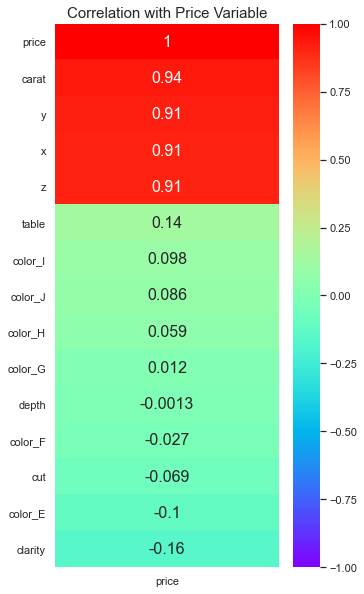

In [953]:
top_features = df_dummy.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)
plt.title("Correlation with Price Variable", size=15)

## Model With Droping high infinity vif values (i.e clarity)

In [954]:
df_dummy.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [955]:
df_dummy_clarity = df_dummy[['carat', 'cut', 'depth', 'table', 'x', 'y', 'z', 'price', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]
df_dummy_clarity.head()

,carat,cut,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,3,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,2,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,4,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,4,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [956]:
f_2 = 'price~carat+cut+depth+table+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [957]:
model_2 = SM.ols(f_2,data=df_dummy_clarity).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.837e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:27   Log-Likelihood:            -2.2064e+05
No. Observations:               26228   AIC:                         4.413e+05
Df Residuals:                   26214   BIC:                         4.414e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1796.3002    888.774      2.021      0.043      54.255    3538.345
carat       9753.8466     83.528    116.773      0.000    9590.126    9917.567
cut          163.1454      7.420     21.988      0.000     148.603     177.688
depth         22.0613     12.644      1.745      0.081      -2.721      46.844
table        -31.0174      3.983     -7.788      0.000     -38.823     -23.211
x          -2431.6106    123.338    -19.715      0.000   -2673.360   -2189.861
y           2487.4534    122.417     20.320      0.000    2247.510    2727.397
z          -1652.8745    168.247     -9.824      0.000   -1982.647   -1323.102
color_E      -87.4234     24.739     -3.534      0.000    -135.914     -38.933
color_F      -46.3618     24.964     -1.857      0.063     -95.292       2.569
color_G      -78.0962     24.135     -3.236      0.001    -125.402     -30.790
color_H     -645.5286     26.026    -24.803      0.000    -696.542    -594.515
color_I    -1037.5961     29.029    -35.743      0.000   -1094.495    -980.697
color_J    -1589.7551     35.635    -44.612      0.000   -1659.602   -1519.908
==============================================================================
Omnibus:                     6528.028   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42237.238
Skew:                           1.039   Prob(JB):                         0.00
Kurtosis:                       8.859   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [958]:
model_name.append('Dropping clarity')
model_perf.append(model_2.rsquared_adj)

In [959]:
X = df_dummy_clarity.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,123.831937
1,cut,10.288690
2,depth,1232.791717
3,table,890.994017
4,x,10622.656364
5,y,9268.255154
6,z,3581.528405
7,color_E,2.467635
8,color_F,2.414616
9,color_G,2.704453


## Model With Droping high infinity vif values (i.e clarity & cut )

In [960]:
df_dummy_clarity.head()

,carat,cut,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,3,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,2,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,4,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,4,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [961]:
df_dummy_cut = df_dummy[['carat', 'table', 'depth', 'x', 'y', 'z', 'price', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]
df_dummy_cut.head()

,carat,table,depth,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,58.0,62.1,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,58.0,60.8,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,60.0,62.2,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,56.0,61.6,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,59.0,60.4,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [962]:
f_3 = 'price~carat+depth+table+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [963]:
model_3 = SM.ols(f_3,data=df_dummy_cut).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:31   Log-Likelihood:            -2.2088e+05
No. Observations:               26228   AIC:                         4.418e+05
Df Residuals:                   26215   BIC:                         4.419e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8791.4438    837.490     10.497      0.000    7149.918    1.04e+04
carat       9799.1081     84.268    116.285      0.000    9633.938    9964.278
depth        -38.3009     12.455     -3.075      0.002     -62.714     -13.888
table        -77.7239      3.400    -22.862      0.000     -84.387     -71.060
x          -2240.5675    124.159    -18.046      0.000   -2483.925   -1997.210
y           2244.2626    123.033     18.241      0.000    2003.111    2485.414
z          -1609.9902    169.776     -9.483      0.000   -1942.761   -1277.219
color_E      -91.2106     24.965     -3.654      0.000    -140.144     -42.277
color_F      -53.2113     25.191     -2.112      0.035    -102.586      -3.836
color_G      -69.2001     24.353     -2.842      0.004    -116.933     -21.467
color_H     -643.4629     26.265    -24.499      0.000    -694.943    -591.983
color_I    -1029.1160     29.293    -35.132      0.000   -1086.532    -971.701
color_J    -1594.7591     35.961    -44.347      0.000   -1665.245   -1524.274
==============================================================================
Omnibus:                     6421.403   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43302.801
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       8.963   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [964]:
model_name.append('Dropping clarity & cut Variable')
model_perf.append(model_3.rsquared_adj)

In [965]:
X = df_dummy_cut.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,123.445387
1,table,717.346755
2,depth,995.217448
3,x,10258.650120
4,y,9220.487106
5,z,2970.856110
6,color_E,2.467627
7,color_F,2.414572
8,color_G,2.702490
9,color_H,2.268440


## Model With Droping high infinity vif values (i.e clarity, cut & Depth)

In [966]:
df_dummy_cut.columns

Index(['carat', 'table', 'depth', 'x', 'y', 'z', 'price', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [967]:
df_dummy_depth = df_dummy[['carat', 'table', 'x', 'y', 'z', 'price', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']]
df_dummy_depth.head()

,carat,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [968]:
f_4 = 'price~carat+table+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [969]:
model_4 = SM.ols(f_4,data=df_dummy_depth).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.127e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:34   Log-Likelihood:            -2.2089e+05
No. Observations:               26228   AIC:                         4.418e+05
Df Residuals:                   26216   BIC:                         4.419e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6317.9942    233.308     27.080      0.000    5860.698    6775.290
carat       9783.7786     84.134    116.288      0.000    9618.871    9948.686
table        -76.2062      3.364    -22.652      0.000     -82.800     -69.612
x          -2108.3495    116.495    -18.098      0.000   -2336.686   -1880.013
y           2401.6581    111.899     21.463      0.000    2182.330    2620.986
z          -2069.6543     80.511    -25.706      0.000   -2227.460   -1911.848
color_E      -90.5630     24.968     -3.627      0.000    -139.502     -41.624
color_F      -52.8264     25.194     -2.097      0.036    -102.209      -3.444
color_G      -68.4754     24.355     -2.811      0.005    -116.214     -20.737
color_H     -643.4703     26.269    -24.495      0.000    -694.959    -591.982
color_I    -1030.6601     29.293    -35.184      0.000   -1088.076    -973.244
color_J    -1595.8035     35.965    -44.371      0.000   -1666.297   -1525.310
==============================================================================
Omnibus:                     6424.709   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43695.197
Skew:                           1.006   Prob(JB):                         0.00
Kurtosis:                       8.995   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [970]:
model_name.append('Dropping clarity, cut & depth Variable')
model_perf.append(model_4.rsquared_adj)

In [971]:
X = df_dummy_depth.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,86.287560
1,table,266.136814
2,x,9980.010927
3,y,9194.625567
4,z,1571.724914
5,color_E,2.461720
6,color_F,2.407718
7,color_G,2.687687
8,color_H,2.254623
9,color_I,1.879980


## Model With Droping high infinity vif values (i.e  clarity, cut, Depth & table )

In [972]:
df_dummy_depth.columns

Index(['carat', 'table', 'x', 'y', 'z', 'price', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [973]:
df_dummy_table = df_dummy[['carat', 'x', 'y', 'z', 'price', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']]
df_dummy_table.head()

,carat,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [974]:
f_5 = 'price~carat+x+y+z+color_E+color_F+color_G+color_H+color_I+color_J'

In [975]:
model_5 = SM.ols(f_5,data=df_dummy_table).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 2.290e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:36   Log-Likelihood:            -2.2114e+05
No. Observations:               26228   AIC:                         4.423e+05
Df Residuals:                   26217   BIC:                         4.424e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1987.0167    135.004     14.718      0.000    1722.401    2251.632
carat       9716.7723     84.899    114.451      0.000    9550.365    9883.179
x          -2557.8977    115.908    -22.068      0.000   -2785.083   -2330.712
y           2546.9890    112.801     22.580      0.000    2325.893    2768.085
z          -1575.7656     78.256    -20.136      0.000   -1729.151   -1422.380
color_E     -100.7475     25.207     -3.997      0.000    -150.155     -51.340
color_F      -50.6219     25.439     -1.990      0.047    -100.484      -0.760
color_G      -56.7776     24.587     -2.309      0.021    -104.969      -8.586
color_H     -635.9057     26.522    -23.976      0.000    -687.891    -583.921
color_I    -1023.4693     29.576    -34.604      0.000   -1081.440    -965.498
color_J    -1599.9764     36.314    -44.059      0.000   -1671.154   -1528.798
==============================================================================
Omnibus:                     6469.011   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42862.732
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                       8.920   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [976]:
model_name.append('Dropping clarity, cut, Depth & table')
model_perf.append(model_5.rsquared_adj)

In [977]:
X = df_dummy_table.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,11.324381
1,x,9570.491400
2,y,9193.516103
3,z,1564.980819
4,color_E,2.433057
5,color_F,2.394265
6,color_G,2.671584
7,color_H,2.234590
8,color_I,1.860607
9,color_J,1.478309


## Model With Droping high infinity vif values (i.e clarity, cut, Depth, table & z Variable)

In [978]:
df_dummy_z = df_dummy[['carat', 'x', 'y', 'price', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J']]
df_dummy_z.head()

,carat,x,y,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4.27,4.29,499.0,1,0,0,0,0,0
1,0.33,4.42,4.46,984.0,0,0,1,0,0,0
2,0.90,6.04,6.12,6289.0,1,0,0,0,0,0
3,0.42,4.82,4.80,1082.0,0,1,0,0,0,0
4,0.31,4.35,4.43,779.0,0,1,0,0,0,0


In [979]:
f_6 = 'price~carat+x+y+color_E+color_F+color_G+color_H+color_I+color_J'

In [980]:
model_6 = SM.ols(f_6,data=df_dummy_z).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.501e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:37   Log-Likelihood:            -2.2134e+05
No. Observations:               26228   AIC:                         4.427e+05
Df Residuals:                   26218   BIC:                         4.428e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1242.7709    130.844      9.498      0.000     986.310    1499.232
carat       9245.5702     82.238    112.425      0.000    9084.380    9406.760
x          -3005.7346    114.628    -26.222      0.000   -3230.412   -2781.057
y           2217.3416    112.464     19.716      0.000    1996.906    2437.777
color_E      -96.6800     25.400     -3.806      0.000    -146.465     -46.895
color_F      -49.9043     25.634     -1.947      0.052    -100.149       0.341
color_G      -61.0586     24.775     -2.465      0.014    -109.618     -12.499
color_H     -641.9958     26.724    -24.023      0.000    -694.377    -589.615
color_I    -1025.6703     29.803    -34.415      0.000   -1084.086    -967.254
color_J    -1606.3712     36.592    -43.900      0.000   -1678.093   -1534.649
==============================================================================
Omnibus:                     6155.626   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40429.222
Skew:                           0.968   Prob(JB):                         0.00
Kurtosis:                       8.766   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [981]:
model_name.append('Dropping clarity, cut, Depth, table & z')
model_perf.append(model_6.rsquared_adj)

In [982]:
X = df_dummy_z.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,11.296452
1,x,9026.828530
2,y,8939.023996
3,color_E,2.431451
4,color_F,2.392727
5,color_G,2.667254
6,color_H,2.229572
7,color_I,1.857403
8,color_J,1.476089


## Model With Droping high infinity vif values (i.e clarity, cut, Depth, table, z & x Variable Variable)

In [983]:
df_dummy_x = df_dummy[['carat', 'y', 'price', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J']]
df_dummy_x.head()

,carat,y,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4.29,499.0,1,0,0,0,0,0
1,0.33,4.46,984.0,0,0,1,0,0,0
2,0.90,6.12,6289.0,1,0,0,0,0,0
3,0.42,4.80,1082.0,0,1,0,0,0,0
4,0.31,4.43,779.0,0,1,0,0,0,0


In [984]:
f_7 = 'price~carat+y+color_E+color_F+color_G+color_H+color_I+color_J'

In [985]:
model_7 = SM.ols(f_7,data=df_dummy_x).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.734e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:39   Log-Likelihood:            -2.2168e+05
No. Observations:               26228   AIC:                         4.434e+05
Df Residuals:                   26219   BIC:                         4.435e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    581.4979    130.061      4.471      0.000     326.572     836.424
carat       8744.9107     81.031    107.921      0.000    8586.086    8903.736
y           -603.0052     33.282    -18.118      0.000    -668.239    -537.771
color_E      -94.0882     25.730     -3.657      0.000    -144.521     -43.656
color_F      -49.9081     25.968     -1.922      0.055    -100.807       0.990
color_G      -62.5366     25.097     -2.492      0.013    -111.728     -13.345
color_H     -649.9867     27.070    -24.011      0.000    -703.045    -596.928
color_I    -1009.2519     30.184    -33.436      0.000   -1068.415    -950.089
color_J    -1584.7831     37.059    -42.764      0.000   -1657.420   -1512.146
==============================================================================
Omnibus:                     5749.280   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37618.064
Skew:                           0.895   Prob(JB):                         0.00
Kurtosis:                       8.587   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [986]:
model_name.append('Dropping clarity, cut, Depth, table, z & x')
model_perf.append(model_7.rsquared_adj)

In [987]:
X = df_dummy_x.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,11.001789
1,y,22.930637
2,color_E,2.430476
3,color_F,2.391847
4,color_G,2.665555
5,color_H,2.226383
6,color_I,1.857345
7,color_J,1.476087


## Model With Droping high infinity vif values (i.e clarity, cut, Depth, table, z, x & y Variable Variable)

In [988]:
df_dummy_y = df_dummy[['carat', 'price', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J']]
df_dummy_y.head()

,carat,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,499.0,1,0,0,0,0,0
1,0.33,984.0,0,0,1,0,0,0
2,0.90,6289.0,1,0,0,0,0,0
3,0.42,1082.0,0,1,0,0,0,0
4,0.31,779.0,0,1,0,0,0,0


In [989]:
f_8 = 'price~carat+color_E+color_F+color_G+color_H+color_I+color_J'

In [990]:
model_8 = SM.ols(f_8,data=df_dummy_y).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 3.081e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:41   Log-Likelihood:            -2.2185e+05
No. Observations:               26228   AIC:                         4.437e+05
Df Residuals:                   26220   BIC:                         4.438e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1739.6345     22.580    -77.042      0.000   -1783.893   -1695.376
carat       7305.4190     16.028    455.780      0.000    7274.003    7336.836
color_E      -91.6368     25.890     -3.539      0.000    -142.382     -40.891
color_F      -56.6515     26.127     -2.168      0.030    -107.861      -5.442
color_G      -60.9168     25.253     -2.412      0.016    -110.414     -11.420
color_H     -631.9695     27.220    -23.217      0.000    -685.322    -578.617
color_I     -980.9674     30.331    -32.342      0.000   -1040.419    -921.516
color_J    -1555.7648     37.254    -41.761      0.000   -1628.785   -1482.744
==============================================================================
Omnibus:                     5175.628   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27366.150
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                       7.704   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [991]:
model_name.append('Dropping clarity, cut, Depth, table, z, x & y')
model_perf.append(model_8.rsquared_adj)

In [992]:
X = df_dummy_y.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,3.405663
1,color_E,1.318681
2,color_F,1.377663
3,color_G,1.503460
4,color_H,1.499119
5,color_I,1.429428
6,color_J,1.277313


### Lets Check features based on high P Value


- For the $\underline{t-statistic}$ for every co-efficient of the Linear Regression the null and alternate Hypothesis is as follows:

- #### ${H_0}$ : The variable is significant.

- #### ${H_1}$:  The variable is not significant.


- Lower the p-value for the t-statistic more significant are the variables.

## Model With Droping high infinity vif values (i.e clarity, cut, Depth, table, z, x, y & color_F  Variable)

In [993]:
df_dummy_color_F = df_dummy[['price', 'carat', 'color_E', 'color_G', 'color_H', 'color_I',
       'color_J']]
df_dummy_color_F.head()

,price,carat,color_E,color_G,color_H,color_I,color_J
0,499.0,0.30,1,0,0,0,0
1,984.0,0.33,0,1,0,0,0
2,6289.0,0.90,1,0,0,0,0
3,1082.0,0.42,0,0,0,0,0
4,779.0,0.31,0,0,0,0,0


In [994]:
f_9 = 'price~carat+color_E+color_G+color_H+color_I+color_J'

In [995]:
model_9 = SM.ols(f_9,data=df_dummy_color_F).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 3.594e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:43   Log-Likelihood:            -2.2185e+05
No. Observations:               26228   AIC:                         4.437e+05
Df Residuals:                   26221   BIC:                         4.438e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1771.7235     17.056   -103.878      0.000   -1805.154   -1738.293
carat       7303.9040     16.014    456.087      0.000    7272.515    7335.293
color_E      -58.5533     20.918     -2.799      0.005     -99.553     -17.553
color_G      -27.6629     20.064     -1.379      0.168     -66.990      11.664
color_H     -598.5149     22.427    -26.688      0.000    -642.472    -554.557
color_I     -947.3319     26.067    -36.343      0.000    -998.424    -896.240
color_J    -1521.9582     33.837    -44.979      0.000   -1588.281   -1455.635
==============================================================================
Omnibus:                     5172.729   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27456.912
Skew:                           0.852   Prob(JB):                         0.00
Kurtosis:                       7.714   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [996]:
model_name.append('Dropping clarity, cut, Depth, table, z, x, y & color_F Variable')
model_perf.append(model_9.rsquared_adj)

In [997]:
X = df_dummy_color_F.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,2.472058
1,color_E,1.231320
2,color_G,1.365445
3,color_H,1.362294
4,color_I,1.311707
5,color_J,1.201292


## Model With Droping high infinity vif values (i.e clarity, cut, Depth, table, z, x, y, color_F & color_G  Variable)

In [998]:
df_dummy_color_G = df_dummy[['price', 'carat', 'color_E', 'color_H', 'color_I',
       'color_J']]
df_dummy_color_G.head()

,price,carat,color_E,color_H,color_I,color_J
0,499.0,0.30,1,0,0,0
1,984.0,0.33,0,0,0,0
2,6289.0,0.90,1,0,0,0
3,1082.0,0.42,0,0,0,0
4,779.0,0.31,0,0,0,0


In [999]:
f_10 = 'price~carat+color_E+color_H+color_I+color_J'

In [1000]:
model_10 = SM.ols(f_10,data=df_dummy_color_G).fit()
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 4.312e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:44   Log-Likelihood:            -2.2185e+05
No. Observations:               26228   AIC:                         4.437e+05
Df Residuals:                   26222   BIC:                         4.438e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1782.2346     15.257   -116.812      0.000   -1812.140   -1752.329
carat       7302.6810     15.990    456.704      0.000    7271.340    7334.022
color_E      -47.2394     19.241     -2.455      0.014     -84.953      -9.526
color_H     -586.9013     20.785    -28.237      0.000    -627.641    -546.161
color_I     -935.5723     24.632    -37.982      0.000    -983.852    -887.292
color_J    -1510.0606     32.719    -46.153      0.000   -1574.191   -1445.930
==============================================================================
Omnibus:                     5187.590   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27641.470
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                       7.731   Cond. No.                         6.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1001]:
model_name.append('Dropping clarity, cut, Depth, table, z, x, y, color_F & color_G Variable')
model_perf.append(model_10.rsquared_adj)

In [1002]:
X = df_dummy_color_G.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,1.810442
1,color_E,1.169410
2,color_H,1.265330
3,color_I,1.228283
4,color_J,1.147419


### Model With Droping high infinity vif values (i.e clarity, cut, Depth, table, z, x, y, color_F & color_G Variable &  color_E) 

In [1003]:
df_dummy_color_E = df_dummy[['price', 'carat', 'color_H', 'color_I',
       'color_J']]
df_dummy_color_E.head()

,price,carat,color_H,color_I,color_J
0,499.0,0.30,0,0,0
1,984.0,0.33,0,0,0
2,6289.0,0.90,0,0,0
3,1082.0,0.42,0,0,0
4,779.0,0.31,0,0,0


In [1004]:
f_11 = 'price~carat+color_H+color_I+color_J'

In [1005]:
model_11 = SM.ols(f_11,data=df_dummy_color_E).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 5.389e+04
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:09:46   Log-Likelihood:            -2.2185e+05
No. Observations:               26228   AIC:                         4.437e+05
Df Residuals:                   26223   BIC:                         4.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1796.3443     14.135   -127.086      0.000   -1824.049   -1768.639
carat       7305.0189     15.963    457.618      0.000    7273.730    7336.308
color_H     -574.8991     20.204    -28.455      0.000    -614.500    -535.298
color_I     -923.8492     24.167    -38.228      0.000    -971.218    -876.480
color_J    -1498.6014     32.387    -46.271      0.000   -1562.082   -1435.120
==============================================================================
Omnibus:                     5183.635   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27534.079
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                       7.720   Cond. No.                         6.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1006]:
model_name.append('Dropping clarity, cut, Depth, table, z, x, y, color_F, color_G & color_E Variable')
model_perf.append(model_11.rsquared_adj)

In [1007]:
X = df_dummy_color_E.drop('price', axis=1)
calc_vif(X)

,variables,VIF
0,carat,1.548167
1,color_H,1.226893
2,color_I,1.195212
3,color_J,1.126063


In [1008]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf})
model_eval

,model_name,model_perf
0,All Variables,0.933220
1,Dropping clarity,0.901050
2,Dropping clarity & cut Variable,0.899229
3,"Dropping clarity, cut & depth Variable",0.899196
4,"Dropping clarity, cut, Depth & table",0.897227
5,"Dropping clarity, cut, Depth, table & z",0.895642
6,"Dropping clarity, cut, Depth, table, z & x",0.892909
7,"Dropping clarity, cut, Depth, table, z, x & y",0.891572
8,"Dropping clarity, cut, Depth, table, z, x, y &...",0.891557
9,"Dropping clarity, cut, Depth, table, z, x, y, ...",0.891553


In [1009]:
model_MLR_1_pred = model_1.fittedvalues
model_MLR_11_pred = model_11.fittedvalues

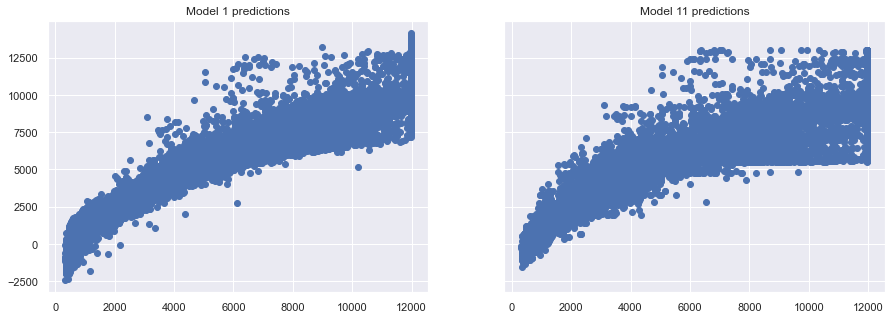

In [1010]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(df_dummy['price'], model_MLR_1_pred)
ax1.set_title('Model 1 predictions')


ax2.scatter(df_dummy_color_E['price'],model_MLR_11_pred)
ax2.set_title('Model 11 predictions')
plt.show()

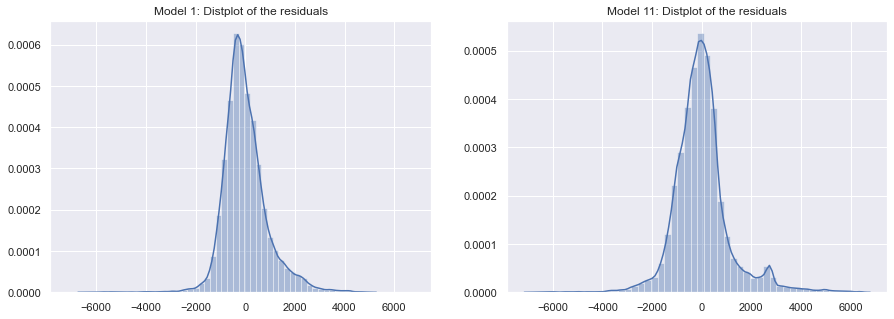

In [1011]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.distplot(model_1.resid, ax=a[0][0], kde=True)
a[0][0].set_title('Model 1: Distplot of the residuals')

plot_1 = sns.distplot(model_11.resid, ax=a[0][1], kde=True)
a[0][1].set_title('Model 11: Distplot of the residuals')
plt.show()


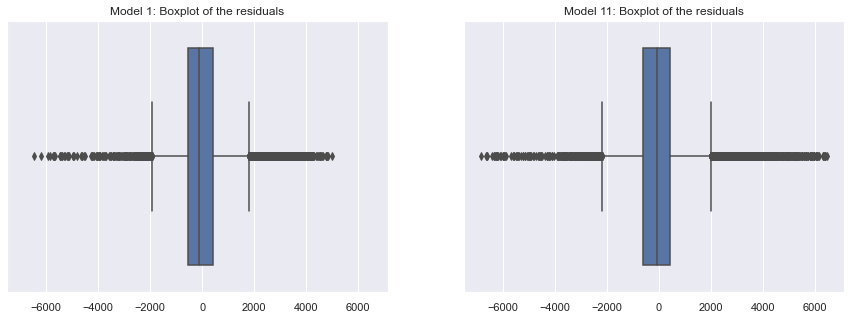

In [1012]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 6 & 7

plot_0 = sns.boxplot(x= model_1.resid, ax=a[0][0])
a[0][0].set_title('Model 1: Boxplot of the residuals')

plot_1 = sns.boxplot(x = model_11.resid, ax=a[0][1])
a[0][1].set_title('Model 11: Boxplot of the residuals')
plt.show()


In [1013]:
from sklearn import metrics

## Model 1 - RMSE

In [1014]:
metrics.mean_squared_error(df_dummy['price'], model_MLR_1_pred,squared=False)

895.0999416702576

## Model 11 - RMSE

In [1015]:
metrics.mean_squared_error(df_dummy_color_E['price'], model_MLR_11_pred,squared=False)

1140.9855885944453

In [1016]:
df_lr = df_dummy_x.copy()

In [1017]:
df_lr

,carat,y,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4.29,499.0,1,0,0,0,0,0
1,0.33,4.46,984.0,0,0,1,0,0,0
2,0.90,6.12,6289.0,1,0,0,0,0,0
3,0.42,4.80,1082.0,0,1,0,0,0,0
4,0.31,4.43,779.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
26962,1.11,6.52,5408.0,0,0,1,0,0,0
26963,0.33,4.42,1114.0,0,0,0,1,0,0
26964,0.51,5.15,1656.0,1,0,0,0,0,0
26965,0.27,4.20,682.0,0,1,0,0,0,0


In [1018]:
from sklearn.linear_model import LinearRegression

In [1019]:
lr = LinearRegression()

Splitting the data into the dependent and independent variables.

In [1020]:
df_dummy.head()

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4,4,62.1,58.0,4.27,4.29,2.66,499.0,1,0,0,0,0,0
1,0.33,3,9,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0
2,0.90,2,7,62.2,60.0,6.04,6.12,3.78,6289.0,1,0,0,0,0,0
3,0.42,4,6,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,0
4,0.31,4,8,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0


In [1021]:
X = df_dummy.drop('price', axis=1)
Y = df_dummy['price']

Splitting the data into train (70%) and test (30%).

In [1022]:
from sklearn.model_selection import train_test_split

In [1023]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Using only Model 1 variables to build the model on the training data and predict on the training as well as test data.

In [1024]:
df_dummy.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [1025]:
df_dummy_x.head()

,carat,y,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,4.29,499.0,1,0,0,0,0,0
1,0.33,4.46,984.0,0,0,1,0,0,0
2,0.90,6.12,6289.0,1,0,0,0,0,0
3,0.42,4.80,1082.0,0,1,0,0,0,0
4,0.31,4.43,779.0,0,1,0,0,0,0


In [1026]:
df_dummy.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [1027]:
model_1 = lr.fit(X_train[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [1028]:
#Training Data Prediction
model_1_pred_train = model_1.predict(X_train[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']])

In [1029]:
#Test Data Prediction
model_1_pred_test = model_1.predict(X_test[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']])

Using only Model 1 variables to build the model on the training data and predict on the training as well as test data.

In [1030]:
df_dummy_color_G.columns

Index(['price', 'carat', 'color_E', 'color_H', 'color_I', 'color_J'], dtype='object')

In [1031]:
model_10 = lr.fit(X_train[['carat', 'color_E', 'color_H', 'color_I', 'color_J']], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [1032]:
#Training Data Prediction
model_10_pred_train = model_10.predict(X_train[['carat', 'color_E', 'color_H', 'color_I', 'color_J']])

In [1033]:
#Test Data Prediction
model_10_pred_test = model_10.predict(X_test[['carat', 'color_E', 'color_H', 'color_I', 'color_J']])

Using only Model 10 variables to build the model on the training data and predict on the training as well as test data.

In [1034]:
df_dummy_color_E.columns

Index(['price', 'carat', 'color_H', 'color_I', 'color_J'], dtype='object')

In [1035]:
model_11 = lr.fit(X_train[['carat', 'color_H', 'color_I', 'color_J']], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [1036]:
#Training Data Prediction
model_11_pred_train = model_11.predict(X_train[['carat', 'color_H', 'color_I', 'color_J']])

In [1037]:
#Test Data Prediction
model_11_pred_test = model_11.predict(X_test[['carat', 'color_H', 'color_I', 'color_J']])

Using only Model 11 variables to build the model on the training data and predict on the training as well as test data.

RMSE check for model 1

In [1038]:
print('Training Data RMSE of model_1:',metrics.mean_squared_error(Y_train,model_1_pred_train,squared=False))
print('Test Data RMSE of model_1:',metrics.mean_squared_error(Y_test,model_1_pred_test,squared=False))

Training Data RMSE of model_1: 892.6960021457866
Test Data RMSE of model_1: 901.2466799149839


In [1039]:
RMSE_Train_1 = metrics.mean_squared_error(Y_train,model_1_pred_train,squared=False)
RMSE_Test_1 = metrics.mean_squared_error(Y_test,model_1_pred_test,squared=False)
print('The RMSE of training data',RMSE_Train_1,'\nThe RMSE of test data',RMSE_Test_1)

The RMSE of training data 892.6960021457866 
The RMSE of test data 901.2466799149839


In [1040]:
result_1 = pd.DataFrame({'RMSE of training data':[RMSE_Train_1],'RMSE of test data':[RMSE_Test_1]},index=['All Variables'])
result_1

,RMSE of training data,RMSE of test data
All Variables,892.696002,901.24668


RMSE check for model 10

In [1041]:
print('Training Data RMSE of model_10:',metrics.mean_squared_error(Y_train,model_10_pred_train,squared=False))
print('Test Data RMSE of model_10:',metrics.mean_squared_error(Y_test,model_10_pred_test,squared=False))

Training Data RMSE of model_10: 1138.301484822186
Test Data RMSE of model_10: 1146.9796550874112


In [1042]:
RMSE_Train_10 = metrics.mean_squared_error(Y_train,model_10_pred_train,squared=False)
RMSE_Test_10 = metrics.mean_squared_error(Y_test,model_10_pred_test,squared=False)
print('The RMSE of training data',RMSE_Train_10,'\nThe RMSE of test data',RMSE_Test_10)

The RMSE of training data 1138.301484822186 
The RMSE of test data 1146.9796550874112


In [1043]:
'carat', 'color_H', 'color_I', 'color_J'

('carat', 'color_H', 'color_I', 'color_J')

In [1044]:
result = pd.DataFrame({'RMSE of training data':[RMSE_Train_10],'RMSE of test data':[RMSE_Test_10]},index=[('Droppping clarity, Depth, table y, z, x, cut, color_F & color_G Variable')])
result 

,RMSE of training data,RMSE of test data
"Droppping clarity, Depth, table y, z, x, cut, color_F & color_G Variable",1138.301485,1146.979655


RMSE check for model 11

In [1045]:
print('Training Data RMSE of model_11:',metrics.mean_squared_error(Y_train,model_11_pred_train,squared=False))
print('Test Data RMSE of model_11:',metrics.mean_squared_error(Y_test,model_11_pred_test,squared=False))

Training Data RMSE of model_11: 1138.3677364125797
Test Data RMSE of model_11: 1147.2233262365678


In [1046]:
RMSE_Train_11 = metrics.mean_squared_error(Y_train,model_11_pred_train,squared=False)
RMSE_Test_11 = metrics.mean_squared_error(Y_test,model_11_pred_test,squared=False)
print('The RMSE of training data',RMSE_Train_11,'\nThe RMSE of test data',RMSE_Test_11)
result_temp = pd.DataFrame({'RMSE of training data':[RMSE_Train_11],'RMSE of test data':[RMSE_Test_11]},index=['i.e Dropping clarity, Depth, table y, z, x, cut, color_F, color_G & color_E Variable'])
result_temp

The RMSE of training data 1138.3677364125797 
The RMSE of test data 1147.2233262365678


,RMSE of training data,RMSE of test data
"i.e Dropping clarity, Depth, table y, z, x, cut, color_F, color_G & color_E Variable",1138.367736,1147.223326


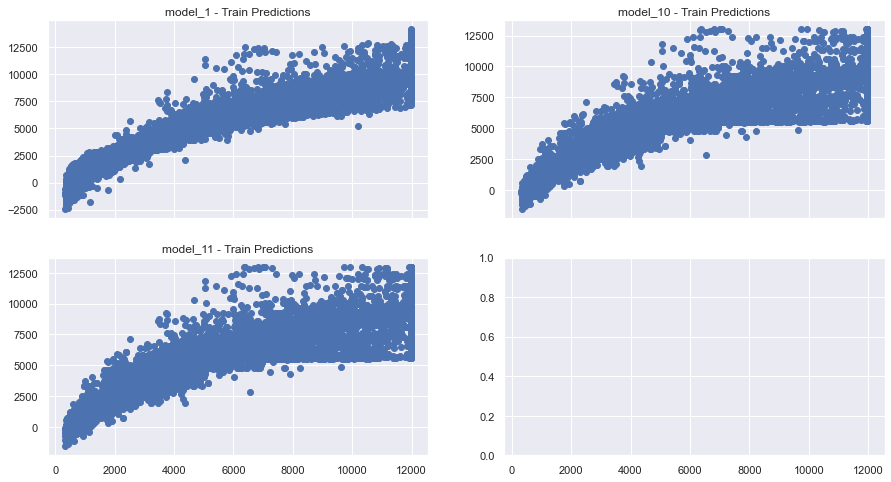

In [1047]:
# Training Data
f,a =  plt.subplots(2,2,sharex=True, figsize=(15,8))
a[0][0].scatter(Y_train,model_1_pred_train)
a[0][0].set_title('model_1 - Train Predictions')
a[0][1].scatter(Y_train,model_10_pred_train)
a[0][1].set_title('model_10 - Train Predictions')
a[1][0].scatter(Y_train,model_11_pred_train)
a[1][0].set_title('model_11 - Train Predictions')


plt.show()

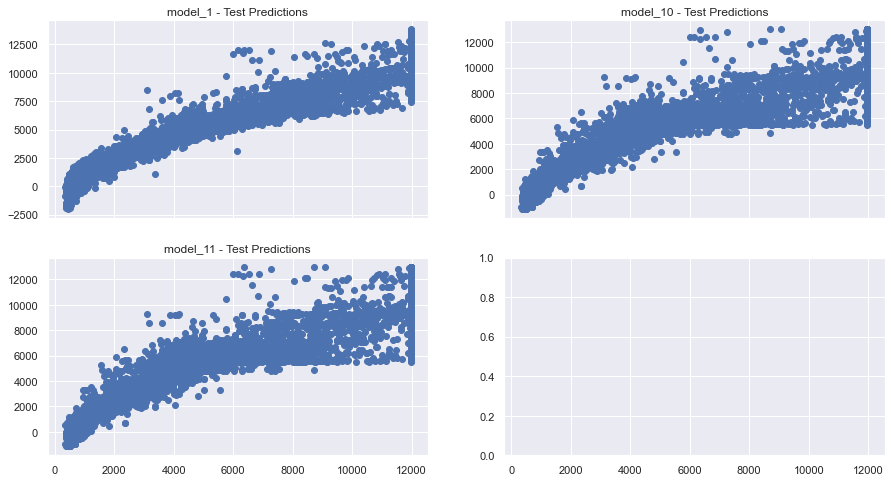

In [1048]:
# Test Data
f,a =  plt.subplots(2,2,sharex=True, figsize=(15,8))
a[0][0].scatter(Y_test,model_1_pred_test)
a[0][0].set_title('model_1 - Test Predictions')
a[0][1].scatter(Y_test,model_10_pred_test)
a[0][1].set_title('model_10 - Test Predictions')
a[1][0].scatter(Y_test,model_11_pred_test)
a[1][0].set_title('model_11 - Test Predictions')

plt.show()

In [1049]:
result = pd.concat([result_1,result,result_temp])
result

,RMSE of training data,RMSE of test data
All Variables,892.696002,901.246680
"Droppping clarity, Depth, table y, z, x, cut, color_F & color_G Variable",1138.301485,1146.979655
"i.e Dropping clarity, Depth, table y, z, x, cut, color_F, color_G & color_E Variable",1138.367736,1147.223326
